##Model LR+TF IDF

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Danantara_Augmented_Preprocessed.csv')

In [ ]:
print("Distribusi Persentase Label:")
print(df['label'].value_counts(normalize=True))

Distribusi Persentase Label:
label
netral     0.333333
Negatif    0.333333
positif    0.333333
Name: proportion, dtype: float64


In [ ]:
# prompt: coba itung berap count value yang di kolom label

print("\nDistribusi Jumlah Label:")
print(df['label'].value_counts())


Distribusi Jumlah Label:
label
netral     100
Negatif    100
positif    100
Name: count, dtype: int64


In [ ]:
# Temukan baris di mana kolom 'stemmed' memiliki nilai kosong (NaN)
baris_kosong = df[df['stemmed'].isnull()]

# Tampilkan beberapa contoh baris yang bermasalah tersebut
print(baris_kosong)

# Lihat distribusi label dari baris-baris yang akan dihapus
print("\nDistribusi label pada baris yang memiliki 'stemmed' kosong:")
print(baris_kosong['label'].value_counts())

Empty DataFrame
Columns: [title, authors, source, published_date, summary, content, url, tag, polarity, subjectivity, original, tokens_awal, no_stopwords, stemmed, label]
Index: []

Distribusi label pada baris yang memiliki 'stemmed' kosong:
Series([], Name: count, dtype: int64)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print("Input awal berhasil dimuat. Jumlah kolom:", len(df.columns))

# 2. Persiapan Data
df.dropna(subset=['stemmed', 'label'], inplace=True)
X_raw = df['stemmed'].astype(str)
y = df['label']

# Membersihkan dan menggabungkan kata-kata di kolom 'stemmed'
X = X_raw.apply(lambda x: x.strip("[]").replace("'", "").replace(", ", " "))

# 3. Membagi Data (tetap diperlukan untuk melatih model secara benar)
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# 4. Vektorisasi TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 5. Melatih Model Logistic Regression
model = LogisticRegression(solver='liblinear', multi_class='auto', random_state=42)
model.fit(X_train_tfidf, y_train)

# Menampilkan laporan performa model dari data uji (tetap berguna untuk mengetahui seberapa baik modelnya)
print("="*60)
print("          Performa Model Logistic Regression")
print("="*60)
print(f"Melakukan evaluasi performa pada {len(X_test)} baris data uji...")
print(f"-"*60)
y_pred_test_LR = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_test))


# 6. Membuat Prediksi untuk SELURUH DATA
print("\nMelakukan prediksi untuk seluruh data...")
# Mengubah seluruh data teks menjadi vektor TF-IDF menggunakan vectorizer yang sudah dilatih
X_tfidf_full = vectorizer.transform(X)
# Melakukan prediksi
all_predictions = model.predict(X_tfidf_full)


# 7. Menambahkan Hasil Prediksi ke DataFrame
# Membuat kolom baru bernama 'LR_label' sesuai permintaan Anda
df['LR_label'] = all_predictions
print("="*60)
print("Kolom 'LR_label' berhasil ditambahkan. Jumlah baris sekarang:", len(X))


# 8. Menyimpan Hasil ke File CSV Baru
output_filename = 'Danantara_Hasil_Prediksi_LR.csv'
df.to_csv(output_filename, index=False)

print(f"\nData beserta hasil prediksi telah berhasil disimpan ke dalam file:")
print(f"'{output_filename}'")

Input awal berhasil dimuat. Jumlah kolom: 15
          Performa Model Logistic Regression
Melakukan evaluasi performa pada 20 baris data uji...
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.83      0.83      0.83         6
           2       0.64      0.88      0.74         8

    accuracy                           0.75        20
   macro avg       0.82      0.74      0.75        20
weighted avg       0.80      0.75      0.74        20


Melakukan prediksi untuk seluruh data...
Kolom 'LR_label' berhasil ditambahkan. Jumlah baris sekarang: 300

Data beserta hasil prediksi telah berhasil disimpan ke dalam file:
'Danantara_Hasil_Prediksi_LR.csv'


In [ ]:
# # Menampilkan beberapa baris pertama dari data dengan kolom baru
# print("\nContoh data dengan kolom label asli dan hasil prediksi:")
# df.head()

In [ ]:
print("\nDistribusi Jumlah Label:")
print(df['label'].value_counts())


Distribusi Jumlah Label:
label
netral     100
Negatif    100
positif    100
Name: count, dtype: int64


Eksport dataframe ke file csv

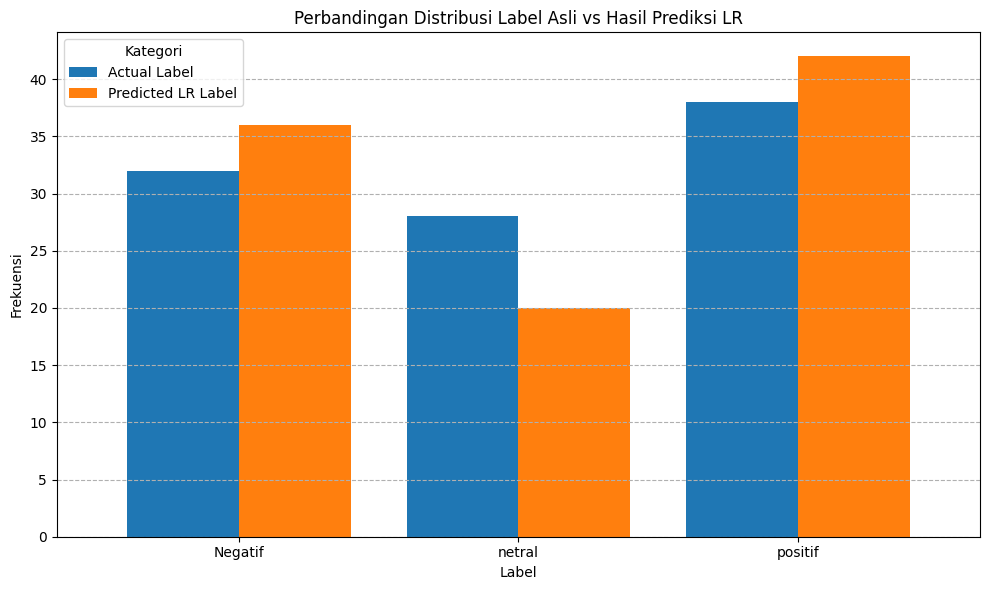

In [ ]:
# prompt: buat perbandingan antara df[label] dengan df[LR], gunakan bar char

import matplotlib.pyplot as plt
import seaborn as sns

# Hitung frekuensi untuk label asli dan hasil prediksi
label_counts = df['label'].value_counts().sort_index()
lr_label_counts = df['LR_label'].value_counts().sort_index()

# Gabungkan kedua Series untuk plot
plot_data = pd.DataFrame({'Actual Label': label_counts, 'Predicted LR Label': lr_label_counts})

# Pastikan semua label muncul di kedua Series, isi NaN dengan 0 jika perlu
plot_data.fillna(0, inplace=True)

# Buat bar plot
plot_data.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Perbandingan Distribusi Label Asli vs Hasil Prediksi LR')
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0) # Biar label di sumbu x tegak
plt.legend(title='Kategori')
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Mengatur layout agar rapi
plt.show()


Ringkasan Prediksi:
Jumlah Prediksi Benar: 89
Jumlah Prediksi Salah: 9

Perbandingan Prediksi Benar vs Salah per Kategori Label:
Prediction_Correct  Incorrect_Predictions  Correct_Predictions
label                                                         
Negatif                                 0                   32
netral                                  8                   20
positif                                 1                   37


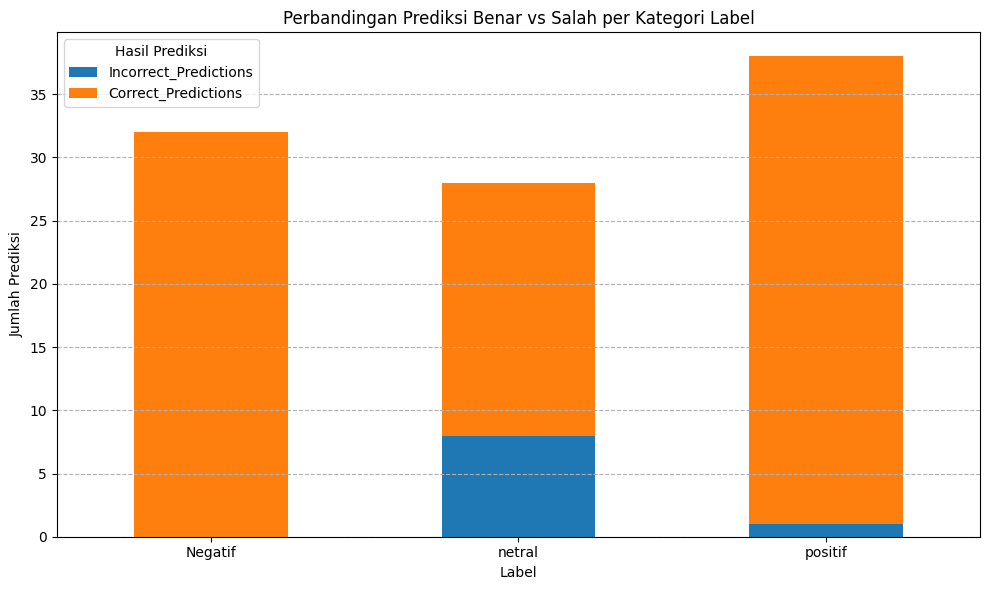

In [ ]:
# prompt: buatkan juga perbandingan antara prediksi benar dan prediksi salah

# Membuat kolom baru untuk menunjukkan apakah prediksi benar atau salah
df['Prediction_Correct'] = df['label'] == df['LR_label']

# Menghitung jumlah prediksi benar dan salah
correct_predictions_count = df['Prediction_Correct'].sum()
incorrect_predictions_count = len(df) - correct_predictions_count

print("\nRingkasan Prediksi:")
print(f"Jumlah Prediksi Benar: {correct_predictions_count}")
print(f"Jumlah Prediksi Salah: {incorrect_predictions_count}")


# Analisis lebih lanjut: Perbandingan prediksi benar/salah per kategori label
comparison_by_label = df.groupby('label')['Prediction_Correct'].value_counts().unstack(fill_value=0)

# Ubah nama kolom agar lebih deskriptif
comparison_by_label.rename(columns={True: 'Correct_Predictions', False: 'Incorrect_Predictions'}, inplace=True)

print("\nPerbandingan Prediksi Benar vs Salah per Kategori Label:")
print(comparison_by_label)

# Visualisasi perbandingan prediksi benar/salah per kategori label
comparison_by_label.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Perbandingan Prediksi Benar vs Salah per Kategori Label')
plt.xlabel('Label')
plt.ylabel('Jumlah Prediksi')
plt.xticks(rotation=0)
plt.legend(title='Hasil Prediksi')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


##praproses pre bert


In [ ]:
import pandas as pd
import re

def preprocess_for_bert(text):
    """
    Fungsi untuk melakukan pembersihan teks minimal yang direkomendasikan untuk BERT.
    """
    # Pastikan input adalah string
    if not isinstance(text, str):
        return ""

    # 1. Case Folding: Mengubah teks menjadi huruf kecil
    text = text.lower()

    # 2. Hapus HTML Tags
    text = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', text)

    # 3. Hapus URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # 4. Hapus Mentions (@username) dan simbol Hashtag (#)
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'#', '', text)      # Hapus simbol hashtag, tapi biarkan katanya

    # 5. Hapus karakter non-standar, tapi pertahankan tanda baca penting
    # Hanya izinkan huruf, angka, spasi, dan tanda baca . , ? !
    text = re.sub(r'[^\w\s.,?!]', '', text)

    # 6. Normalisasi Spasi: Ubah spasi ganda atau lebih menjadi satu spasi
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# --- SCRIPT UTAMA ---

# Memuat dataset Anda
try:

    # Memilih kolom 'content' sebagai sumber teks mentah
    source_text_column = 'content'

    # Membuat kolom baru untuk menampung teks yang sudah bersih
    cleaned_column_name = 'cleaned_content'

    print(f"Melakukan pra-pemrosesan pada kolom '{source_text_column}'...")
    # Terapkan fungsi pra-pemrosesan ke setiap baris di kolom 'content'
    df[cleaned_column_name] = df[source_text_column].apply(preprocess_for_bert)
    print("Pra-pemrosesan selesai.")

    # Menampilkan perbandingan antara teks asli dan teks yang sudah dibersihkan
    print("\n" + "="*70)
    print("       Perbandingan Teks Asli vs Teks Bersih untuk BERT")
    print("="*70)
    # Mengatur pandas agar menampilkan teks penuh
    pd.set_option('display.max_colwidth', None)
    print(df[[source_text_column, cleaned_column_name]].head(5))

    # Menyimpan DataFrame yang sudah berisi kolom bersih ke file CSV baru
    output_filename = 'Danantara_Preprocessed_BERT.csv'
    df.to_csv(output_filename, index=False)

    print("\n" + "="*70)
    print(f"Dataset yang siap untuk BERT telah disimpan sebagai '{output_filename}'")
    print(f"Gunakan kolom '{cleaned_column_name}' dari file ini untuk proses fine-tuning BERT.")
    print("="*70)

except FileNotFoundError:
    print(f"ERROR: File '{file_path}' tidak ditemukan. Mohon periksa kembali nama dan lokasi file.")

Melakukan pra-pemrosesan pada kolom 'content'...
Pra-pemrosesan selesai.

       Perbandingan Teks Asli vs Teks Bersih untuk BERT
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

##Model BERT E5_LR3e5

In [ ]:
# Import libraries jika belum ada
# !pip install transformers torch scikit-learn pandas matplotlib seaborn

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm.notebook import tqdm
from torch.optim import AdamW

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan menggunakan GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Menggunakan device: {device}')

# Asumsi DataFrame 'df' sudah dimuat dan berisi kolom 'cleaned_content' dan 'label'
# df = pd.read_csv('nama_file_anda.csv')

# Persiapan Data
df.dropna(subset=['cleaned_content', 'label'], inplace=True)
df['cleaned_content'] = df['cleaned_content'].apply(lambda x: str(x).strip("[]").replace("'", "").replace(", ", " "))

# Encoding label
unique_labels = df['label'].unique()
label_map = {label: i for i, label in enumerate(unique_labels)}
id_map = {i: label for i, label in enumerate(unique_labels)}
df['label_encoded'] = df['label'].map(label_map)

# Pembagian Data
X = df['cleaned_content']
y = df['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True), y_train.reset_index(drop=True), y_test.reset_index(drop=True)

# Inisialisasi Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

# Custom Dataset (tidak ada perubahan di sini)
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text, add_special_tokens=True, max_length=self.max_len,
            return_token_type_ids=False, padding='max_length',
            return_attention_mask=True, return_tensors='pt', truncation=True
        )
        return {
            'text': text, 'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Parameter
MAX_LEN = 128
BATCH_SIZE = 16

# Membuat Dataset & DataLoader (tidak ada perubahan di sini)
train_dataset = SentimentDataset(X_train.tolist(), y_train.tolist(), tokenizer, MAX_LEN)
test_dataset = SentimentDataset(X_test.tolist(), y_test.tolist(), tokenizer, MAX_LEN)
train_data_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Memuat Model
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels=len(unique_labels))
model = model.to(device)


# --- PERUBAHAN 1: Mengatur Hyperparameter Baru ---
print("\n" + "="*60)
print("             Menggunakan Hyperparameter Baru")
print("="*60)
EPOCHS = 5
LEARNING_RATE = 3e-5
print(f"Epochs: {EPOCHS}, Learning Rate: {LEARNING_RATE}")
print("="*60)

# Mengatur Optimizer dan Scheduler dengan LR baru
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Fungsi Pelatihan dan Evaluasi (tidak ada perubahan di sini)
def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses, correct_predictions = [], 0
    for d in tqdm(data_loader, desc="Training"):
        input_ids, attention_mask, labels = d["input_ids"].to(device), d["attention_mask"].to(device), d["labels"].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss, logits = outputs.loss, outputs.logits
        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
    return correct_predictions.double() / n_examples, np.mean(losses)

def eval_model(model, data_loader, device, n_examples):
    model = model.eval()
    losses, correct_predictions = [], 0
    with torch.no_grad():
        for d in tqdm(data_loader, desc="Evaluating"):
            input_ids, attention_mask, labels = d["input_ids"].to(device), d["attention_mask"].to(device), d["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss, logits = outputs.loss, outputs.logits
            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())
    return correct_predictions.double() / n_examples, np.mean(losses)

# Loop Pelatihan dengan Epoch baru
history = {'train_acc': [], 'train_loss': [], 'val_acc': [], 'val_loss': []}
best_accuracy = 0
best_model_filename = 'best_bert_model_E5_LR3e5.bin' # Nama file model terbaik yang baru

for epoch in range(EPOCHS):
    print(f'\nEpoch {epoch + 1}/{EPOCHS}')
    train_acc, train_loss = train_epoch(model, train_data_loader, optimizer, device, scheduler, len(X_train))
    print(f'Train loss {train_loss:.4f} accuracy {train_acc:.4f}')
    val_acc, val_loss = eval_model(model, test_data_loader, device, len(X_test))
    print(f'Val loss {val_loss:.4f} accuracy {val_acc:.4f}')
    history['train_acc'].append(train_acc); history['train_loss'].append(train_loss); history['val_acc'].append(val_acc); history['val_loss'].append(val_loss)
    if val_acc > best_accuracy:
        best_accuracy = val_acc
        torch.save(model.state_dict(), best_model_filename) # Simpan dengan nama file baru
        print(f"Model terbaik disimpan ke '{best_model_filename}'!")

print("\nPelatihan selesai.")

# Memuat model terbaik dari eksperimen ini
model.load_state_dict(torch.load(best_model_filename))
model = model.to(device)

# Fungsi Prediksi (tidak ada perubahan di sini)
def get_predictions(model, data_loader, device):
    model = model.eval()
    predictions, real_values = [], []
    with torch.no_grad():
        for d in tqdm(data_loader, desc="Predicting"):
            input_ids, attention_mask, labels = d["input_ids"].to(device), d["attention_mask"].to(device), d["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)
            predictions.extend(preds)
            real_values.extend(labels)
    return torch.stack(predictions).cpu(), torch.stack(real_values).cpu()

# Evaluasi pada Test Set (tidak ada perubahan signifikan di sini)
_, y_pred_encoded = get_predictions(model, test_data_loader, device)
y_test_encoded = test_dataset.labels
y_pred_labels = [id_map[pred.item()] for pred in y_pred_encoded]
y_test_labels = [id_map[label] for label in y_test_encoded]

# ===================================================================
# === BAGIAN AKHIR: PREDIKSI SELURUH DATA & PENYIMPANAN HASIL BARU ===
# ===================================================================
print("\n" + "="*60)
print("   Memulai Proses Prediksi pada Seluruh Dataset (Eksperimen Baru)")
print("="*60)

# Membuat DataLoader untuk seluruh data
full_dataset = SentimentDataset(X.tolist(), y.tolist(), tokenizer, MAX_LEN)
full_data_loader = DataLoader(full_dataset, batch_size=32, shuffle=False)
print("DataLoader untuk seluruh data berhasil dibuat.")

# Melakukan prediksi
print("\nMelakukan prediksi pada seluruh data...")
full_predictions_encoded, _ = get_predictions(model, full_data_loader, device)
print("Prediksi untuk seluruh data selesai.")

# Menambahkan hasil prediksi ke DataFrame
full_predictions_labels = [id_map[pred.item()] for pred in full_predictions_encoded]
df['BERT_label_E5_LR3e5'] = full_predictions_labels # Nama kolom baru yang spesifik
print("\nKolom prediksi baru 'BERT_label_E5_LR3e5' berhasil ditambahkan.")

# --- PERUBAHAN 2: Menyimpan Hasil ke File CSV Baru ---
# Nama file output baru yang spesifik untuk eksperimen ini
output_filename_new_experiment = 'Hasil_Prediksi_BERT_E5_LR3e5.csv'
df.to_csv(output_filename_new_experiment, index=False)

print(f"\nDataFrame lengkap dengan hasil eksperimen baru telah disimpan ke:")
print(f"'{output_filename_new_experiment}'")

Menggunakan device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



             Menggunakan Hyperparameter Baru
Epochs: 5, Learning Rate: 3e-05

Epoch 1/5


Training:   0%|          | 0/5 [00:00<?, ?it/s]

Train loss 1.1070 accuracy 0.3846


Evaluating:   0%|          | 0/2 [00:00<?, ?it/s]

Val loss 1.0746 accuracy 0.4500
Model terbaik disimpan ke 'best_bert_model_E5_LR3e5.bin'!

Epoch 2/5


Training:   0%|          | 0/5 [00:00<?, ?it/s]

Train loss 1.0280 accuracy 0.5769


Evaluating:   0%|          | 0/2 [00:00<?, ?it/s]

Val loss 1.0461 accuracy 0.4500

Epoch 3/5


Training:   0%|          | 0/5 [00:00<?, ?it/s]

Train loss 0.9363 accuracy 0.6538


Evaluating:   0%|          | 0/2 [00:00<?, ?it/s]

Val loss 1.0113 accuracy 0.4500

Epoch 4/5


Training:   0%|          | 0/5 [00:00<?, ?it/s]

Train loss 0.8822 accuracy 0.6282


Evaluating:   0%|          | 0/2 [00:00<?, ?it/s]

Val loss 0.9909 accuracy 0.4000

Epoch 5/5


Training:   0%|          | 0/5 [00:00<?, ?it/s]

Train loss 0.8272 accuracy 0.6410


Evaluating:   0%|          | 0/2 [00:00<?, ?it/s]

Val loss 0.9784 accuracy 0.4500

Pelatihan selesai.


Predicting:   0%|          | 0/2 [00:00<?, ?it/s]


   Memulai Proses Prediksi pada Seluruh Dataset (Eksperimen Baru)
DataLoader untuk seluruh data berhasil dibuat.

Melakukan prediksi pada seluruh data...


Predicting:   0%|          | 0/4 [00:00<?, ?it/s]

Prediksi untuk seluruh data selesai.

Kolom prediksi baru 'BERT_label_E5_LR3e5' berhasil ditambahkan.

DataFrame lengkap dengan hasil eksperimen baru telah disimpan ke:
'Hasil_Prediksi_BERT_E5_LR3e5.csv'



Confusion Matrix (Test Set):


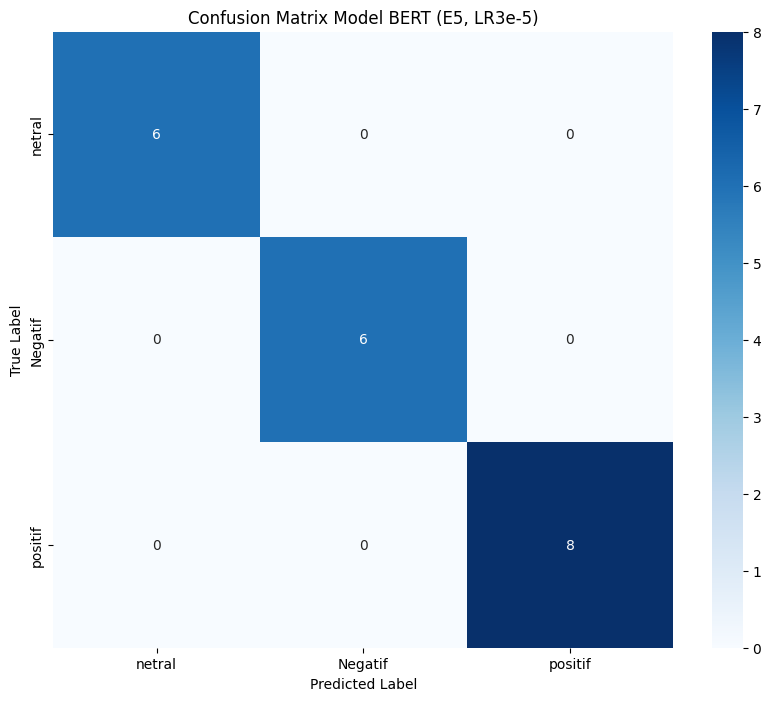

Model terbaik 'best_bert_model_E5_LR3e5.bin' berhasil dimuat untuk evaluasi akhir.


Predicting:   0%|          | 0/2 [00:00<?, ?it/s]


      Laporan Klasifikasi (Epoch=5, LR=3e-5)
              precision    recall  f1-score   support

      netral       1.00      0.17      0.29         6
     Negatif       0.00      0.00      0.00         6
     positif       0.42      1.00      0.59         8

    accuracy                           0.45        20
   macro avg       0.47      0.39      0.29        20
weighted avg       0.47      0.45      0.32        20


Confusion Matrix (Test Set):


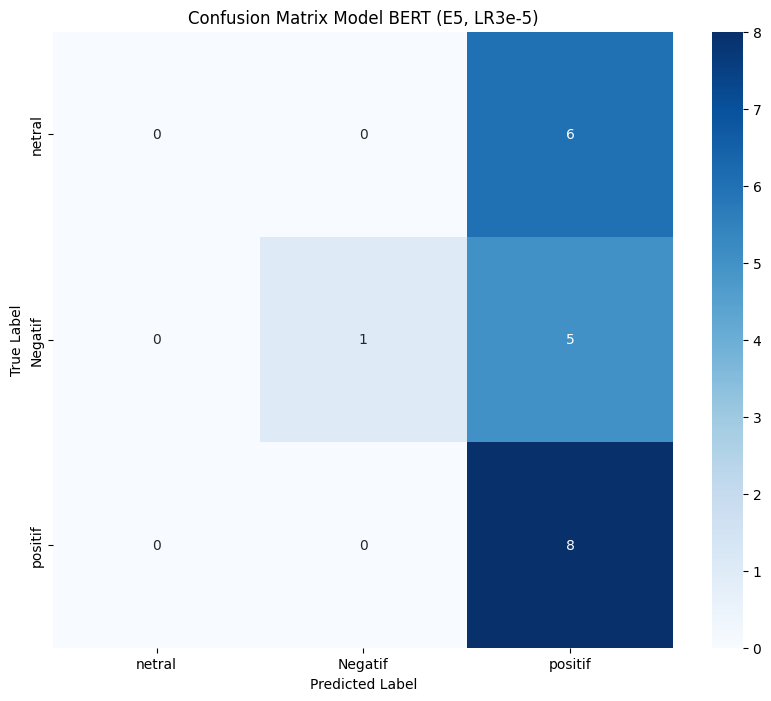

In [ ]:
# ===================================================================
# === BAGIAN AKHIR: ANALISIS MENDALAM & VISUALISASI HASIL ===
# ===================================================================

# Tampilkan Confusion Matrix
print("\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=unique_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix Model BERT (E5, LR3e-5)') # Judul sudah disesuaikan
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# ===================================================================
# === EVALUASI, PREDIKSI, & ANALISIS LENGKAP (Eksperimen E5, LR3e-5) ===
# ===================================================================

# Memuat model terbaik dari eksperimen ini
# Pastikan nama file ini sesuai dengan yang Anda simpan di loop training
best_model_filename = 'best_bert_model_E5_LR3e5.bin'
model.load_state_dict(torch.load(best_model_filename))
model = model.to(device)
print(f"Model terbaik '{best_model_filename}' berhasil dimuat untuk evaluasi akhir.")

# --- Bagian A: Evaluasi Performa pada Test Set ---

# Fungsi Prediksi (pastikan sudah terdefinisi dari sel sebelumnya)
def get_predictions(model, data_loader, device):
    model = model.eval()
    texts, predictions, prediction_probs, real_values = [], [], [], []
    with torch.no_grad():
        for d in tqdm(data_loader, desc="Predicting"):
            texts.extend(d["text"])
            input_ids, attention_mask, labels = d["input_ids"].to(device), d["attention_mask"].to(device), d["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            _, preds = torch.max(logits, dim=1)
            predictions.extend(preds)
            prediction_probs.extend(torch.softmax(logits, dim=1).tolist())
            real_values.extend(labels)
    predictions = torch.stack(predictions).cpu()
    real_values = torch.stack(real_values).cpu()
    return texts, predictions, prediction_probs, real_values

# Dapatkan prediksi HANYA untuk data uji
_, y_pred_encoded, _, y_test_encoded_tensors = get_predictions(model, test_data_loader, device)

# Ubah hasil prediksi kembali ke label asli
y_pred_labels = [id_map[pred.item()] for pred in y_pred_encoded]
y_test_labels = [id_map[label.item()] for label in y_test_encoded_tensors]

# Tampilkan Laporan Klasifikasi
print("\n" + "="*60)
print("      Laporan Klasifikasi (Epoch=5, LR=3e-5)")
print("="*60)
print(classification_report(y_test_labels, y_pred_labels, target_names=unique_labels))

# Tampilkan Confusion Matrix
print("\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=unique_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix Model BERT (E5, LR3e-5)') # Judul disesuaikan
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




In [ ]:
# --- Bagian B: Prediksi pada Seluruh Data dan Penyimpanan ---

print("\n" + "="*60)
print("   Memulai Proses Prediksi pada Seluruh Dataset (Eksperimen Baru)")
print("="*60)

# Membuat DataLoader untuk seluruh data
full_dataset = SentimentDataset(X.tolist(), y.tolist(), tokenizer, MAX_LEN)
full_data_loader = DataLoader(full_dataset, batch_size=32, shuffle=False)
print("DataLoader untuk seluruh data berhasil dibuat.")

# Melakukan prediksi pada seluruh data
full_texts, full_predictions_encoded, _, _ = get_predictions(model, full_data_loader, device)
print("Prediksi untuk seluruh data selesai.")

# Mengubah hasil prediksi kembali ke label asli
full_predictions_labels = [id_map[pred.item()] for pred in full_predictions_encoded]

# Menambahkan hasil prediksi ke DataFrame dengan nama kolom baru yang spesifik
new_col_name = 'BERT_label_E5_LR3e5' # Nama kolom disesuaikan
df[new_col_name] = full_predictions_labels
print(f"\nKolom prediksi baru '{new_col_name}' berhasil ditambahkan.")

# Menyimpan Hasil ke File CSV Baru yang spesifik
output_filename_new_experiment = 'Hasil_Prediksi_BERT_E5_LR3e5.csv' # Nama file disesuaikan
df.to_csv(output_filename_new_experiment, index=False)
print(f"\nDataFrame lengkap telah disimpan ke '{output_filename_new_experiment}'")


# --- Bagian C: Analisis Mendalam dan Visualisasi ---

# 1. Visualisasi Perbandingan Distribusi Label
print("\nVisualisasi Perbandingan Distribusi Label:")
label_counts_asli = df['label'].value_counts().sort_index()
label_counts_prediksi = df[new_col_name].value_counts().sort_index() # Menggunakan kolom baru
plot_data = pd.DataFrame({'Label Asli': label_counts_asli, f'Prediksi {new_col_name}': label_counts_prediksi})
plot_data.fillna(0, inplace=True)
plot_data.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title(f'Perbandingan Distribusi Label Asli vs Prediksi ({new_col_name})') # Judul disesuaikan
plt.xlabel('Label'); plt.ylabel('Frekuensi'); plt.xticks(rotation=0)
plt.legend(title='Kategori'); plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()

# 2. Analisis Prediksi Benar vs Salah
correct_col_name = 'BERT_Correct_E5_LR3e5' # Nama kolom baru
df[correct_col_name] = df['label'] == df[new_col_name]
correct_predictions_count = df[correct_col_name].sum()
incorrect_predictions_count = len(df) - correct_predictions_count
print("\nRingkasan Prediksi (Eksperimen E5, LR3e-5):")
print(f"Jumlah Prediksi Benar: {correct_predictions_count}")
print(f"Jumlah Prediksi Salah: {incorrect_predictions_count}")

# 3. Analisis Benar/Salah per Kategori Label
comparison_by_label = df.groupby('label')[correct_col_name].value_counts().unstack(fill_value=0)
comparison_by_label.rename(columns={True: 'Prediksi Benar', False: 'Prediksi Salah'}, inplace=True)
print("\nPerbandingan Prediksi Benar vs Salah per Kategori Label:")
print(comparison_by_label)
comparison_by_label.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='coolwarm')
plt.title(f'Analisis Kesalahan Prediksi per Kategori ({new_col_name})') # Judul disesuaikan
plt.xlabel('Label Asli'); plt.ylabel('Jumlah Prediksi'); plt.xticks(rotation=0)
plt.legend(title='Hasil Prediksi'); plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()

# 4. Plotting Training History
print("\nPlotting Training History (Eksperimen E5, LR3e-5):")
plt.figure(figsize=(14, 6))
# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss', marker='o')
plt.plot(history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss (E5, LR3e-5)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)
# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot([h.cpu().numpy() if isinstance(h, torch.Tensor) else h for h in history['train_acc']], label='Train Accuracy', marker='o')
plt.plot([h.cpu().numpy() if isinstance(h, torch.Tensor) else h for h in history['val_acc']], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy (E5, LR3e-5)')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
display_cols = [col for col in df.columns if 'label' in col.lower()]
df[display_cols].head(15)

,label,LR_label,label_encoded,BERT_label_E5_LR3e5
0,netral,netral,0,netral
1,netral,netral,0,netral
2,Negatif,Negatif,1,positif
3,positif,positif,2,positif
4,netral,netral,0,netral
5,netral,netral,0,positif
6,Negatif,Negatif,1,Negatif
7,Negatif,Negatif,1,positif
8,positif,positif,2,positif
9,Negatif,Negatif,1,positif


In [ ]:
# prompt: tunjukkan di index berapa saja prediksi bert benar tapi prediksi LR salah, tanpa content atau content nya diganti ummary aja

# Identifikasi kasus di mana BERT benar tapi LR salah
bert_correct_lr_incorrect_indices = df.index[
    (df['BERT_label_E5_LR3e5'] == df['label']) &  # BERT benar
    (df['LR_label'] != df['label'])             # LR salah
].tolist()

print("Index baris di mana prediksi BERT benar tapi prediksi LR salah:")
print(bert_correct_lr_incorrect_indices)

# Jika Anda ingin menampilkan ringkasan baris-baris tersebut (tanpa konten penuh)
print("\nSummary (Label, LR_label, BERT_label_E5_LR3e5) for these indices:")
if bert_correct_lr_incorrect_indices:
    # Ambil subset DataFrame untuk index yang diinginkan
    summary_df = df.loc[bert_correct_lr_incorrect_indices, ['label', 'LR_label', 'BERT_label_E5_LR3e5']]
    print(summary_df)
else:
    print("Tidak ada baris yang memenuhi kriteria.")


Index baris di mana prediksi BERT benar tapi prediksi LR salah:
[13, 22, 23, 49]

Summary (Label, LR_label, BERT_label_E5_LR3e5) for these indices:
      label LR_label BERT_label_E5_LR3e5
13  positif  Negatif             positif
22   netral  positif              netral
23   netral  Negatif              netral
49   netral  Negatif              netral


In [ ]:
#5b Menjelaskan Kemampuan BERT (terutama untuk kalimat ambigu, panjang, atau sarkastik)
print("\n" + "="*60)
print("            Analisis Kemampuan BERT vs Logistic Regression")
print("="*60)
print("a. Apakah BERT mampu mengklasifikasikan sentimen dengan lebih baik (terutama untuk kalimat ambigu, panjang, atau sarkastik)?")
print("-" * 60)
print("Secara teoritis dan umum berdasarkan riset, model berbasis Transformer seperti BERT cenderung memiliki kemampuan yang lebih baik dalam memahami konteks, nuansa, dan hubungan antar kata dalam kalimat dibandingkan model tradisional seperti Logistic Regression + TF-IDF.")
print("\nAlasan utamanya adalah:")
print("- **Pemahaman Konteks:** BERT membaca teks secara bidirectional (dua arah) menggunakan mekanisme *attention*. Ini memungkinkannya memahami makna sebuah kata berdasarkan kata-kata di sekitarnya, baik sebelum maupun sesudahnya. Model TF-IDF+LR memperlakukan teks sebagai 'Bag-of-Words' atau 'Bag-of-Ngrams', yang kehilangan banyak informasi kontekstual.")
print("- **Menangani Ambiguitas:** Dengan pemahaman konteks yang lebih baik, BERT lebih mampu membedakan makna kata atau frasa yang sama di konteks yang berbeda, sehingga lebih baik dalam menangani ambiguitas.")
print("- **Kalimat Panjang:** BERT dapat memproses urutan teks yang lebih panjang (hingga *max_len* yang ditentukan) dan mempertahankan representasi kontekstual di seluruh urutan tersebut. TF-IDF + LR kesulitan menangani ketergantungan jangka panjang dalam kalimat panjang.")
print("- **Sarkasme dan Nuansa Halus:** Sarkasme seringkali bergantung pada kontras antara makna literal kata dan konteksnya, serta pemahaman intonasi (dalam teks diwakili oleh tanda baca, kata-kata penekanan, dll.). Kemampuan BERT untuk memahami hubungan kompleks antar kata dan menangkap pola-pola ini membuatnya berpotensi lebih baik dalam mendeteksi sarkasme atau sentimen halus lainnya.")
print("\n**Kesimpulan Teoritis:** Ya, BERT *seharusnya* mampu mengklasifikasikan sentimen dengan lebih baik, terutama pada kasus-kasus kompleks seperti kalimat ambigu, panjang, atau yang mengandung sarkasme, karena arsitekturnya yang canggih dalam pemahaman bahasa.")
print("\n**Validasi Praktis:** Untuk memvalidasi ini secara empiris pada dataset spesifik Anda, kita perlu menganalisis kasus-kasus di mana LR salah dan BERT benar, terutama pada kalimat-kalimat yang memiliki karakteristik tersebut (ambigu, panjang, sarkastik). Confusion Matrix dan Classification Report yang sudah Anda hasilkan sebelumnya memberikan gambaran agregat, namun analisis per kasus lebih mendalam diperlukan untuk membuktikannya.")

# 3. Menunjukkan Contoh Prediksi yang Sebelumnya Salah Diklasifikasikan (oleh LR), Tapi Benar dengan BERT
print("\nb. Tunjukkan contoh prediksi yang sebelumnya salah diklasifikasikan (oleh LR), tapi benar dengan BERT.")
print("-" * 60)

# Identifikasi kasus di mana LR salah, tapi BERT benar
incorrect_by_lr_correct_by_bert = df[
    (df['LR_label'] != df['label']) &  # LR salah
    (df['BERT_label_E5_LR3e5'] == df['label']) # BERT benar
]

print(f"Ditemukan {len(incorrect_by_lr_correct_by_bert)} contoh di mana LR salah dan BERT benar.")

if not incorrect_by_lr_correct_by_bert.empty:
    print("\nBeberapa contoh kasus:")
    # Ambil beberapa contoh (misalnya 5 contoh)
    examples_to_show = incorrect_by_lr_correct_by_bert.head(5)

    # Tampilkan kolom yang relevan
    cols_to_display = ['content', 'label', 'LR_label', 'BERT_label_E5_LR3e5']
    print(examples_to_show[cols_to_display])

    print("\nAnalisis ringkas contoh:")
    for index, row in examples_to_show.iterrows():
        print(f"\n--- Contoh Index {index} ---")
        print(f"Teks: {row['content']}")
        print(f"Label Asli: {row['label']}")
        print(f"Prediksi LR: {row['LR_label']} (Salah)")
        print(f"Prediksi BERT: {row['BERT_label_E5_LR3e5']} (Benar)")
        # Anda bisa menambahkan kode untuk menganalisis karakteristik teks ini
        # Apakah teksnya panjang? Ambigu? Mengandung sarkasme?
        # Ini memerlukan analisis manual per contoh atau pola yang lebih canggih.
        print("Analisis karakteristik teks (panjang, ambigu, sarkasme, dll.) diperlukan untuk menjelaskan mengapa BERT berhasil di sini.")

else:
    print("Tidak ada contoh ditemukan di mana LR salah dan BERT benar dalam dataset ini.")
    print("Ini bisa terjadi jika performa LR sudah sangat baik, atau jika perbaikan BERT tidak signifikan pada dataset spesifik ini.")

print("\n" + "="*60)
print("            Akhir Analisis Perbandingan Model")
print("="*60)



            Analisis Kemampuan BERT vs Logistic Regression
a. Apakah BERT mampu mengklasifikasikan sentimen dengan lebih baik (terutama untuk kalimat ambigu, panjang, atau sarkastik)?
------------------------------------------------------------
Secara teoritis dan umum berdasarkan riset, model berbasis Transformer seperti BERT cenderung memiliki kemampuan yang lebih baik dalam memahami konteks, nuansa, dan hubungan antar kata dalam kalimat dibandingkan model tradisional seperti Logistic Regression + TF-IDF.

Alasan utamanya adalah:
- **Pemahaman Konteks:** BERT membaca teks secara bidirectional (dua arah) menggunakan mekanisme *attention*. Ini memungkinkannya memahami makna sebuah kata berdasarkan kata-kata di sekitarnya, baik sebelum maupun sesudahnya. Model TF-IDF+LR memperlakukan teks sebagai 'Bag-of-Words' atau 'Bag-of-Ngrams', yang kehilangan banyak informasi kontekstual.
- **Menangani Ambiguitas:** Dengan pemahaman konteks yang lebih baik, BERT lebih mampu membedakan makna kata 


     Perbandingan Performa Model (Data Uji)
Tabel Perbandingan Metrik Utama:

                 Model  Accuracy  Precision (Macro)  Recall (Macro)  F1-score (Macro)
0  Logistic Regression      0.75           0.823232        0.736111          0.745614
1   BERT (E5, LR 3e-5)      0.50           0.481481        0.444444          0.371795


--- Visualisasi Perbandingan ---


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipython-input-22-3611241065.py:55: FutureWar

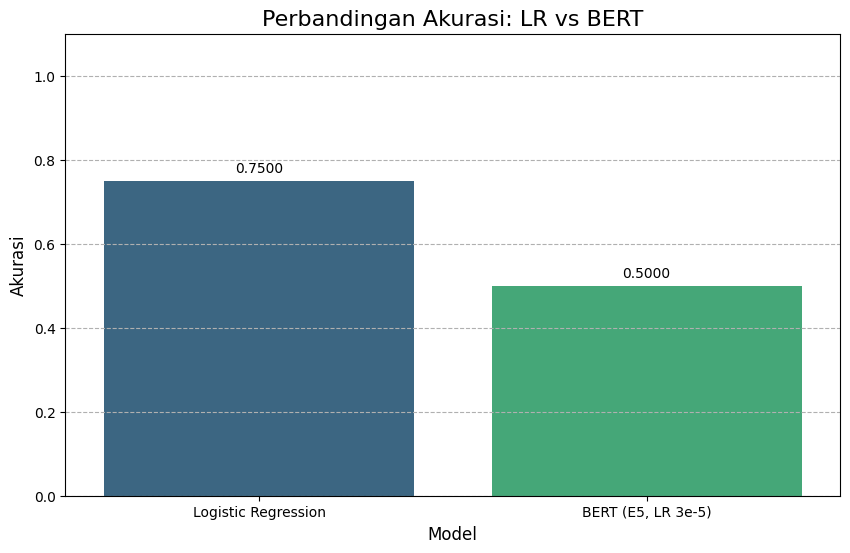

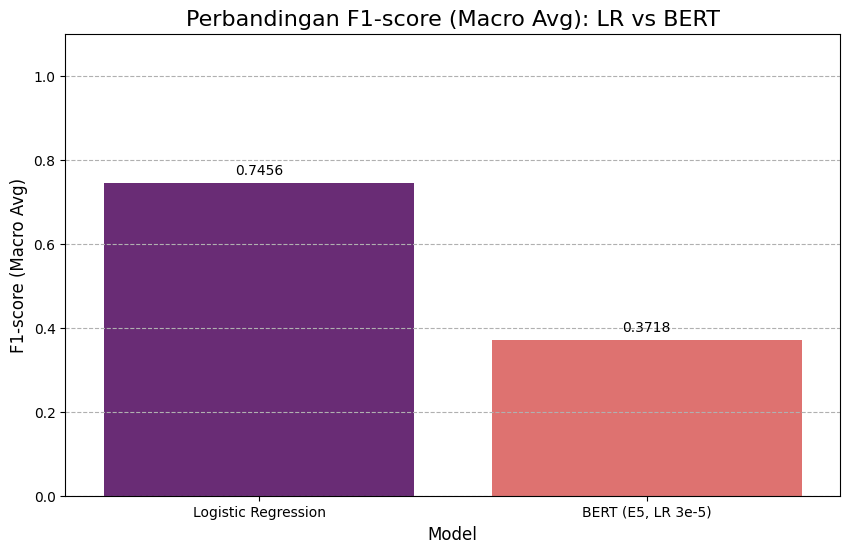


             Analisis Perbandingan Selesai


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# ===================================================================
# === BAGIAN AKHIR: PERBANDINGAN PERFORMA LR vs BERT ===
# ===================================================================

print("\n" + "="*60)
print("     Perbandingan Performa Model (Data Uji)")
print("="*60)

# --- LANGKAH 1: Mengumpulkan Metrik dari Kedua Model ---

# A. Ambil metrik dari Logistic Regression + TF-IDF
# Variabel y_test dan y_pred_test diambil dari sel [8] di notebook Anda
lr_report_dict = classification_report(y_test, y_pred_test_LR, output_dict=True)
lr_accuracy = lr_report_dict['accuracy']
lr_f1_macro = lr_report_dict['macro avg']['f1-score']
lr_recall_macro = lr_report_dict['macro avg']['recall']
lr_precision_macro = lr_report_dict['macro avg']['precision']


# B. Ambil metrik dari model BERT (Eksperimen E5, LR3e-5)
# Variabel y_test_labels dan y_pred_labels diambil dari sel [15]
bert_report_dict = classification_report(y_test_labels, y_pred_labels, output_dict=True)
bert_accuracy = bert_report_dict['accuracy']
bert_f1_macro = bert_report_dict['macro avg']['f1-score']
bert_recall_macro = bert_report_dict['macro avg']['recall']
bert_precision_macro = bert_report_dict['macro avg']['precision']


# --- LANGKAH 2: Membuat Tabel Perbandingan ---

# Buat DataFrame untuk perbandingan metrik
comparison_data = {
    'Model': ['Logistic Regression', 'BERT (E5, LR 3e-5)'],
    'Accuracy': [lr_accuracy, bert_accuracy],
    'Precision (Macro)': [lr_precision_macro, bert_precision_macro],
    'Recall (Macro)': [lr_recall_macro, bert_recall_macro],
    'F1-score (Macro)': [lr_f1_macro, bert_f1_macro]
}
comparison_df = pd.DataFrame(comparison_data)

print("Tabel Perbandingan Metrik Utama:\n")
print(comparison_df.to_string())


# --- LANGKAH 3: Membuat Visualisasi Perbandingan ---

# A. Visualisasi Perbandingan Akurasi
print("\n\n--- Visualisasi Perbandingan ---")
plt.figure(figsize=(10, 6))
barplot_acc = sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis')
plt.title('Perbandingan Akurasi: LR vs BERT', fontsize=16)
plt.ylabel('Akurasi', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1.1) # Batasi sumbu y dari 0 hingga 1
for p in barplot_acc.patches:
    barplot_acc.annotate(f'{p.get_height():.4f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')
plt.grid(axis='y', linestyle='--')
plt.show()

# B. Visualisasi Perbandingan F1-score Macro
plt.figure(figsize=(10, 6))
barplot_f1 = sns.barplot(x='Model', y='F1-score (Macro)', data=comparison_df, palette='magma')
plt.title('Perbandingan F1-score (Macro Avg): LR vs BERT', fontsize=16)
plt.ylabel('F1-score (Macro Avg)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1.1)
for p in barplot_f1.patches:
    barplot_f1.annotate(f'{p.get_height():.4f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')
plt.grid(axis='y', linestyle='--')
plt.show()

print("\n" + "="*60)
print("             Analisis Perbandingan Selesai")
print("="*60)